In [47]:
# Piezoelctric Bending test setup 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [48]:
# Meshing for the Piezoelectric Strip under Bending ... 
#  (0,0.5) x ------------x (1,0.5)
#          |             |
#          |             |
#          |             |
#          |             |
# (0,-0.5) x ------------x (1,-0.5)

x = np.array([0,1,1,0])
y = np.array([-0.5, -0.5, 0.5, 0.5])

# Get Max x-length and y-length 
x_length = np.max(x) - np.min(x)
y_length = np.max(y) - np.min(y)

# get mesh points in geometry 
x_linspace = np.linspace(np.min(x), np.max(x), 9, endpoint=True)
y_linspace = np.linspace(np.min(y), np.max(y), 9, endpoint=True)

# loop for making list of points 
x_mesh = []
y_mesh = []
for i in range(len(y_linspace)):
    for j in range(len(x_linspace)):
        x_mesh.append(x_linspace[j])
        y_mesh.append(y_linspace[i])

mesh_file = open('Mesh_data.csv',mode='w')
for i in range(len(x_mesh)):
    mesh_file.write(np.str(i+1))
    mesh_file.write(',')
    mesh_file.write(np.str(x_mesh[i]))
    mesh_file.write(',')
    mesh_file.write(np.str(y_mesh[i]))
    # mesh_file.write(',')
    mesh_file.write('\n')
mesh_file.close()

In [49]:
# Element Connectivity 
Element_connectivity = open('Ele_conn.csv',mode='w')
# Element_connectivity.write('Element_no, node1, node2, node3, node4')
# Element_connectivity.write('\n')
node_1 = []
node_2 = []
node_3 = []
node_4 = []
for j in range(8): 
      for i in range(8):
        node_1.append((j*(8+1)) + (i+1))
        node_2.append((j*(8+1)) + (i+2))
        node_4.append(((j+1)*(8+1))+(i+1))
        node_3.append(((j+1)*(8+1))+(i+2))
print(np.shape(node_4))        
for i in range(len(node_1)):
    Element_connectivity.write(np.str(i+1))
    Element_connectivity.write(',')
    Element_connectivity.write(np.str(node_1[i]))
    Element_connectivity.write(',')
    Element_connectivity.write(np.str(node_2[i]))
    Element_connectivity.write(',')
    Element_connectivity.write(np.str(node_3[i]))
    Element_connectivity.write(',')
    Element_connectivity.write(np.str(node_4[i]))
    # Element_connectivity.write(',')
    Element_connectivity.write('\n')

Element_connectivity.close()

(64,)


In [50]:
s11 = 16.4 * 10**-6
s13 = -7.22 * 10**-6
s33 = 18.8 * 10**-6
s55 = 47.5 * 10**-6
sigma_0 = -5
sigma_1 = 20
L = 1
d31 = -172 * 10**-9
d33 = -374 * 10**-9
d15 = 584 * 10**-9
g11 = 1.53 * 10**-8
g33 = 1.505 * 10**-8
V0 = 1000
h = 0.5


def u(x,z):
    A = s11 * (sigma_0 - ((d31*V0)/(s11*h)))
    B = s11 * (1 - ((d31**2)/(s11*g33))) * sigma_1 * x * z 
    u = A + B 
    return u 

def v(x,z):
    P =  s13 * (sigma_0 - ((d33*V0)/(s13*h))) * z

    Q = s13 * (1 - ((d33*d31)/(s13*g33))) * sigma_1 * ((z**2)/2) 

    R = - s11 * (1 - ((d31**2)/(s11*g33))) * sigma_1 * ((x**2) / 2)   
    v = P + Q + R
    return v

def phi(x,z):
    M = V0*(z/h) 
    N = (d31*sigma_1*(h**2 - z**2)) / (2 * g33)
    PHi = M + N 
    return PHi   

In [51]:
# Right nodes for displacement bcs
y_right_nodes = np.array([-0.5, -0.375, -0.25, -0.125, 0, 0.125, 0.25, 0.375, 0.5])
u_1 = u(1, y_right_nodes)
v_1 = v(1, y_right_nodes)
phi_1 = phi(1, y_right_nodes)
nodes_right = np.linspace(9,81,9,endpoint=True)
print(nodes_right)
print(u_1)
print(v_1)
print(phi_1)

[ 9. 18. 27. 36. 45. 54. 63. 72. 81.]
[0.00011766 0.00015374 0.00018983 0.00022591 0.000262   0.00029809
 0.00033417 0.00037026 0.00040634]
[-5.65128571e-04 -4.54544196e-04 -3.47551786e-04 -2.44151339e-04
 -1.44342857e-04 -4.81263393e-05  4.44982143e-05  1.33530804e-04
  2.18971429e-04]
[-1000.          -762.5         -521.42857143  -276.78571429
   -28.57142857   223.21428571   478.57142857   737.5
  1000.        ]


In [52]:
# Mesh with 9 x 9 Elements 
# Input File Generation for Beam Under Parabolic Loading (Plane Stress)
Input_file = open('Piezoelectric_Strip_Bending.inp', mode='w')

# Heading 
Input_file.write('*HEADING')
Input_file.write('\n')
Input_file.write('Piezoelectric strip under Bending ')
Input_file.write('\n')

# Preprint 
Input_file.write('*PREPRINT, ECHO=YES, HISTORY=NO, MODEL=NO')
Input_file.write('\n')

# Node List 
Input_file.write('*NODE')
Input_file.write('\n')
with open('Mesh_data.csv') as mesh_data:
    for line in mesh_data:
        Input_file.write(line)
# User Element Type 
Input_file.write('*USER ELEMENT, TYPE=U1, NODES=4, PROPERTIES=9,COORDINATES=2, VARIABLES=10')
Input_file.write('\n')
Input_file.write('1, 2, 9')
Input_file.write('\n')

# Element connectivity 
Input_file.write('*ELEMENT, TYPE=U1, ELSET=EALL')
Input_file.write('\n')
with open('Ele_conn.csv') as ele_conn:
      for line in ele_conn:
        Input_file.write(line)

# UEL Property 
Input_file.write('*UEL PROPERTY, ELSET=EALL')
Input_file.write('\n')
Input_file.write('73382.57, 28182.03, 64014.58, 21052.63, -0.02316, -0.0278, 0.012, 1.53105e-8,')
Input_file.write('\n')
Input_file.write('1.505e-8')
Input_file.write('\n')

# Node Sets 
# Boundary 
Input_file.write('*Nset, nset=Set_boundary')
Input_file.write('\n')
Input_file.write('37')
Input_file.write('\n')
# Left Nodes 
Input_file.write('*Nset, nset=left_nodes')
Input_file.write('\n')
Input_file.write('1, 10, 19, 28, 46, 55, 64, 73')
Input_file.write('\n')


# Top Nodes 
Input_file.write('*Nset, nset=Top_nodes')
Input_file.write('\n')
Input_file.write('73, 74, 75, 76, 77, 78, 79, 80,')
Input_file.write('\n')
Input_file.write('81')
Input_file.write('\n')


# Bottom Nodes
Input_file.write('*Nset, nset=Bottom_nodes')
Input_file.write('\n')
Input_file.write('1, 2, 3, 4, 5, 6, 7, 8,')
Input_file.write('\n')
Input_file.write('9')
Input_file.write('\n')


# Right Nodes
Input_file.write('*Nset, nset=Right_nodes')
Input_file.write('\n')
Input_file.write('9, 18, 27, 36, 45, 54, 63, 72,')
Input_file.write('\n')
Input_file.write('81')
Input_file.write('\n')


# Step 
Input_file.write('*STEP')
Input_file.write('\n')
Input_file.write('*STATIC')
Input_file.write('\n')
Input_file.write('1.,1.,1e-05,1.')
Input_file.write('\n')

# Boundary conditions 
Input_file.write('*BOUNDARY')
Input_file.write('\n')
Input_file.write('Set_boundary, 1, 1')
Input_file.write('\n')
Input_file.write('Set_boundary, 2, 2')
Input_file.write('\n')
Input_file.write('left_nodes, 1, 1')
Input_file.write('\n')
Input_file.write('Top_nodes, 9, 9, 1000.')
Input_file.write('\n')
Input_file.write('Bottom_nodes, 9, 9, -1000.')
Input_file.write('\n')

# Application of Displacement Boundary Conditions ... 
for i in range(len(nodes_right)):
    Input_file.write(np.str(np.int(nodes_right[i]))+', 1, 1,'+np.str(u_1[i]))
    Input_file.write('\n')
#     Input_file.write(np.str(np.int(nodes_right[i]))+', 2, 2,'+np.str(v_1[i]))
#     Input_file.write('\n')
#     Input_file.write(np.str(np.int(nodes_right[i]))+', 9, 9,'+np.str(phi_1[i]))
#     Input_file.write('\n')
    
# Output Requests 
Input_file.write('*OUTPUT,FIELD')
Input_file.write('\n')
Input_file.write('*ENERGY FILE')
Input_file.write('\n')
Input_file.write('*OUTPUT,HISTORY,FREQUENCY=1')
Input_file.write('\n')
Input_file.write('*ENERGY OUTPUT,VARIABLE=PRESELECT')
Input_file.write('\n')
Input_file.write('*NODE FILE')
Input_file.write('\n')
Input_file.write('U,COORD')
Input_file.write('\n')
Input_file.write('*OUTPUT,FIELD')
Input_file.write('\n')
Input_file.write('*NODE OUTPUT')
Input_file.write('\n')
Input_file.write('U,COORD, EPOT')
Input_file.write('\n')
Input_file.write('*NODE PRINT')
Input_file.write('\n')
Input_file.write('U,COORD,EPOT')
Input_file.write('\n')
Input_file.write('*EL PRINT')
Input_file.write('\n')
Input_file.write('SDV')
Input_file.write('\n')
Input_file.write('*END STEP')

Input_file.close()

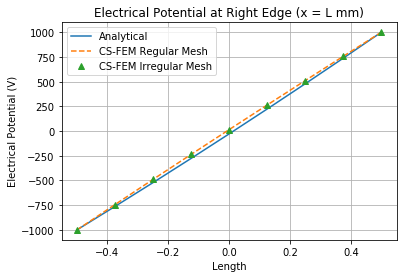

In [71]:
# Right nodes 
right_y = np.linspace(-0.5, 0.5, 9, endpoint=True)
PHI_right = phi(1,right_y)
Phi_Obtained = np.array([-1000, -743.643, -489.102, -236.378, 14.53, 263.62, 510.89, 756.3569, 1000])
Phi_Irr = np.array([-1000, -743.58, -489.149, -236.367, 14.50, 263.5781, 510.86, 756.32 ,1000])

plt.plot(right_y, PHI_right, label='Analytical')
plt.plot(right_y, Phi_Obtained, '--', label='CS-FEM Regular Mesh ')
plt.plot(right_y, Phi_Irr,'^',label='CS-FEM Irregular Mesh')

plt.title('Electrical Potential at Right Edge (x = L mm)')
plt.xlabel('Length')
plt.ylabel('Electrical Potential (V)')
plt.grid()
plt.legend()
plt.savefig('EPOT_Bending.png', bbox_inches= 'tight')
plt.show()

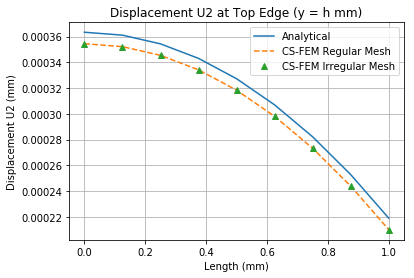

In [74]:
# Top Nodes 
top_x = np.linspace(0, 1, 9, endpoint=True)

u2_top = v(top_x, 0.5)
u2_top_obtained = np.array([0.000354408, 0.000352152, 0.000345386, 0.000334109, 0.000318322, 0.000298024, 0.000273215, 0.000243895, 0.000210065])
u2_irr = np.array([0.000354399, 0.000352035, 0.000345292, 0.000334136, 0.000318373, 0.000298171, 0.000273183, 0.000243658, 0.000209891])

plt.plot(top_x, u2_top, label = 'Analytical')
plt.plot(top_x, u2_top_obtained,'--',label = 'CS-FEM Regular Mesh')
plt.plot(top_x, u2_irr,'^',label = 'CS-FEM Irregular Mesh')
plt.grid()
plt.legend()
plt.title('Displacement U2 at Top Edge (y = h mm)')
plt.xlabel('Length (mm)')
plt.ylabel('Displacement U2 (mm)')
plt.savefig('Disp_U2_Bending.png', bbox_inches= 'tight')
plt.show()